In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_2000 = pd.read_csv('Data/final_tmdb_data_2000.csv.gz')

In [4]:
df_2001 = pd.read_csv('Data/final_tmdb_data_2001.csv.gz')

In [5]:
df_combined = pd.concat([df_2000, df_2001], ignore_index=True)
df_combined.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.5,22.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.1,8.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,0.0,0.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843.0,cn,花樣年華,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.1,1987.0,PG


How many movies had at least some valid financial information (values > 0 for budget OR revenue)?


In [5]:
budget = df_combined['budget']>0

In [6]:
revenue = df_combined['revenue']>0

In [7]:
df_combined.loc[budget&revenue].shape

(349, 26)

There are 349 movies had some valid financial information

How many movies are there in each of the certification categories (G/PG/PG-13/R)?

In [8]:
df_combined['certification'].value_counts()

R          452
PG-13      181
NR          67
PG          64
G           24
NC-17        6
Unrated      1
-            1
Name: certification, dtype: int64

<AxesSubplot:>

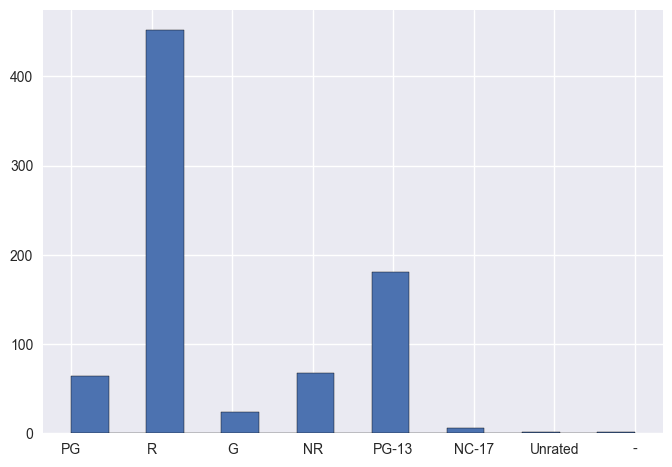

In [14]:
plt.style.use('seaborn')
df_combined['certification'].hist(bins =15, edgecolor='black')

What is the average revenue per certification category?

In [20]:
cer_rev = df_combined.groupby('certification')['revenue'].mean()
cer_rev

certification
-          0.000000e+00
G          7.216332e+07
NC-17      0.000000e+00
NR         2.255067e+06
PG         6.143535e+07
PG-13      7.160834e+07
R          1.682113e+07
Unrated    0.000000e+00
Name: revenue, dtype: float64

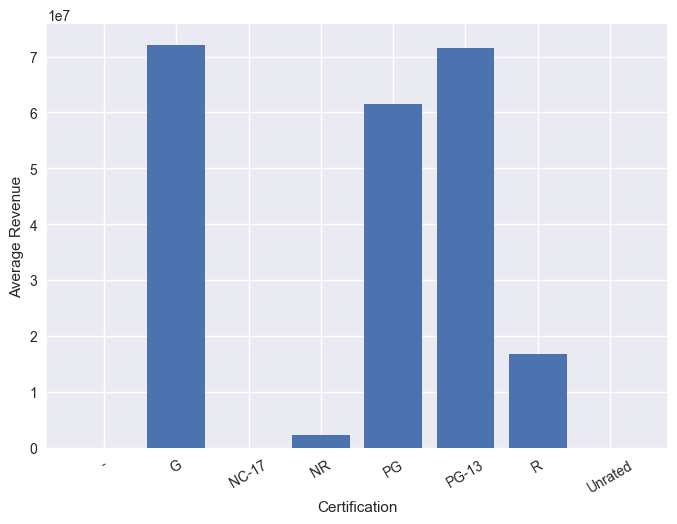

In [21]:
plt.bar(cer_rev.index, cer_rev.values)
plt.ylabel('Average Revenue')
plt.xlabel('Certification')
plt.xticks(rotation=30)
plt.show()

What is the average budget per certification category?

In [18]:
cer_bug = df_combined.groupby('certification')['budget'].mean()
cer_bug

certification
-          0.000000e+00
G          2.383333e+07
NC-17      0.000000e+00
NR         1.598509e+06
PG         2.459766e+07
PG-13      3.123154e+07
R          9.998904e+06
Unrated    0.000000e+00
Name: budget, dtype: float64

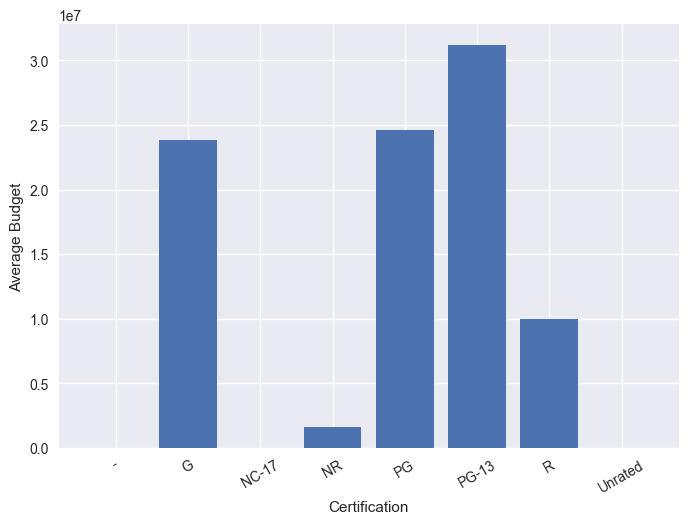

In [19]:
plt.bar(cer_bug.index, cer_bug.values)
plt.ylabel('Average Budget')
plt.xlabel('Certification')
plt.xticks(rotation=30)
plt.show()

## Save the final merged

In [11]:
import os
os.makedirs('Data/',exist_ok=True) 

In [12]:
df_combined.to_csv("Data/tmdb_results_combined.csv.gz",compression='gzip',index=False)